## figure 1.

Please change the dataPath relative to the directory where you downloaded the file : ~/Jazi_etal_2023_noInter/autopi_behavior_2021

## Figure 1


In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2
%run ../setup_behaviour.py

myProject = Project(name=projectName,dataPath=dataPath)
fn=myProject.dataPath+"/testing_sessions"
print("Reading " + fn)
sessionNamesTesting = pd.read_csv(fn) # this will be a pandas dataframe
myProject.createSessionList(sessionNameList=sessionNamesTesting.sessionName.to_list())
print("We have {} recording sessions".format(len(myProject.sessionList)))

Project name: autopi_behavior_2021
dataPath: /d80/Jazi_etal_2023_noInter/autopi_behavior_2021
Project name: autopi_behavior_2021
dataPath: /d80/Jazi_etal_2023_noInter/autopi_behavior_2021
Reading /d80/Jazi_etal_2023_noInter/autopi_behavior_2021/testing_sessions
We have 67 recording sessions


Load the trial data frame.

In [2]:
fn =  myProject.dataPath+"/results/trialsTrainSet.csv"
df = pd.read_csv(fn)
print("Training set")
print("Number of trials: {}".format(len(df)))
print("Number of valid trials: {}".format(sum(df.valid)))
# get rid of invalid trials
df = df[df.valid]
print("Total number of valid trials: {}".format(len(df)))
# per condition
print("Number of light trials: {}".format(sum(df.light=="light")))
print("Number of dark trials: {}".format(sum(df.light=="dark")))

Training set
Number of trials: 4520
Number of valid trials: 4453
Total number of valid trials: 4453
Number of light trials: 2429
Number of dark trials: 2024


In [3]:
import warnings

# Filter and ignore FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
ses = myProject.sessionList[20]#20
ses.extractTrialFeatures()

mn4673-06102019-1534 trial segmentation
Remove door closing event at the beginning of the session, index 21
problem with the door alternation
Problem with index 908
Removing the second of two door closings (index :908)
Problem with index 1614
Removing the second of two door closings (index :1614)
Number of trials : 89
mn4673-06102019-1534, video len: 108793, video-log len:108793, first fr.: 0, max log gap: 7.0, mean time diff: 0.0335, max time diff: 0.126, num prob. diff: 0, frame rate: 29.8
Sampling rate below 29.9 Hz.
Lenght of mouseLeverPosi: 108793
Lenght of videoLog: 108793
(1884, 3) (0, 3) (111, 3)
we reached here!
(1884, 3) (0, 3) (111, 3)
we reached here!
(1884, 3) (0, 3) (111, 3)
we reached here!
mn4673-06102019-1534_4, self.startTime was adjusted by -0.2 s
(1884, 3) (0, 3) (111, 3)
we reached here!
mn4673-06102019-1534_5, self.startTime was adjusted by -0.3 s
(1884, 3) (0, 3) (111, 3)
we reached here!
(1884, 3) (0, 3) (111, 3)
we reached here!
mn4673-06102019-1534_7, self.sta

(-0.5, 5460.5, 5078.5, -0.5)

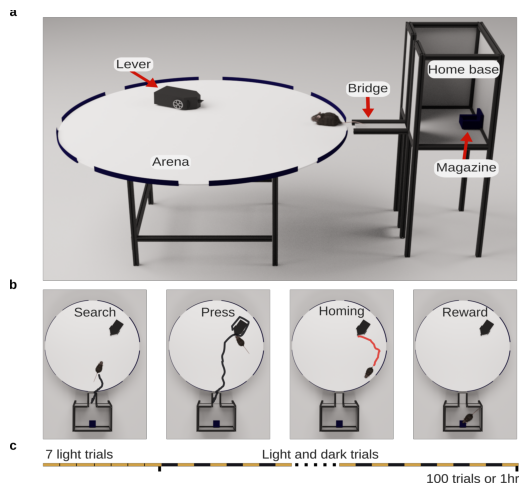

In [5]:
#### load the image 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig= plt.figure()
ax= fig.gca()
image_path = "/home/maryam/repo/autopi_analysis_bk/Jazi_et.al_2023_noInt/fig1/setup.png"
img = mpimg.imread(image_path)
img.shape
ax.imshow(img)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0 - 0.095, pos1.y0-0.01,  pos1.width * 1.28, pos1.height * 1.28] 
ax.set_position(pos2) # set a new position
ax.patch.set_facecolor('white')
ax.axis('off')


## generate figure 1, panel d to g.

(-43.99994673255666, 43.99999746345508, -55.0, 45.0)

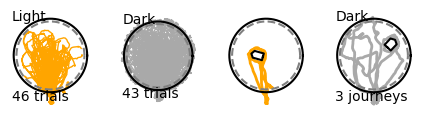

In [6]:
col = 4
row = 2
sizeProw = 2
sizePcol = 2
fig = plt.figure(figsize=(col*sizePcol, row*sizeProw))
gs = gridspec.GridSpec(row, 12, wspace=1, hspace=0.25)
fig.tight_layout()

# to plot the arena circle
arena = np.arange(start=0, stop=2*np.pi, step=0.02)
arenaRadiusProportionToPeri = 0.925
arenaRadius = 40

def plot_trial(ax, light_type, color):
    ax.set_aspect('equal', adjustable='box')

    for t in ses.trialList:
        if t.light == light_type:
            ax.plot(t.trialMLCm.mouseX,
                    t.trialMLCm.mouseY, linewidth=1, color=color)

    ax.plot(np.cos(arena)*arenaRadius, np.sin(arena)*arenaRadius, label="Arena", color="black")
    ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri, np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,
            label="Periphery", color="gray", linestyle='dashed')
    ax.set_xlabel("cm")
    ax.set_ylabel("cm")
    ax.set_ylim(-55, 45)
    ax.xaxis.set_label_coords(0.5, -0.11)
    ax.yaxis.set_label_coords(-0.125, 0.5)
    ax.set_xticks(np.arange(-40, 80, 40))
    ax.set_yticks(np.arange(-40, 80, 40))
    ax.tick_params(axis='both', which='major', pad=3)
    ax.text(-42, -49, '{} trials'.format(len([t for t in ses.trialList if t.light == light_type])))
    ax.text(-42, 38, light_type.capitalize())
    ax.axis('off')

# plot all light trials
ax = plt.subplot(gs[1, :2])
plot_trial(ax, "light", 'orange')

# plot a light trial
ax = plt.subplot(gs[1, 4:6])
t = ses.trialList[11]
lev = np.append(t.leverCm.points, t.leverCm.points[0, :]).reshape((-1, 2))
ax.set_aspect('equal', adjustable='box')

for i in range(len(t.journeyStartEndIndices)):
    ax.plot(t.trialMLCm.mouseX.loc[t.journeyStartEndIndices.start.iloc[i]:t.journeyStartEndIndices.end.iloc[i]],
            t.trialMLCm.mouseY.loc[t.journeyStartEndIndices.start.iloc[i]:t.journeyStartEndIndices.end.iloc[i]],
            label="Arena", linewidth=2, color='orange')

ax.plot(lev[:, 0], lev[:, 1], color="black")
ax.plot(np.cos(arena)*arenaRadius, np.sin(arena)*arenaRadius, label="Arena", color="black")
ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri, np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,
        label="Periphery", color="gray", linestyle='dashed')
ax.set_xlabel("cm")
ax.set_ylabel("cm")
ax.set_ylim(-55, 45)
ax.xaxis.set_label_coords(0.5, -0.11)
ax.yaxis.set_label_coords(-0.125, 0)
ax.axis('off')

# plot all dark trials
ax = plt.subplot(gs[1, 2:4])
plot_trial(ax, "dark",'darkgray')

ax = plt.subplot(gs[1,6:8])
t = ses.trialList[18]
lev = np.append(t.leverCm.points,t.leverCm.points[0,:]).reshape((-1,2))
ax.set_aspect('equal', adjustable='box')
## plot each journey with different color
for i in range(len(t.journeyStartEndIndices)):
    ax.plot(t.trialMLCm.mouseX.loc[t.journeyStartEndIndices.start.iloc[i]:t.journeyStartEndIndices.end.iloc[i]],
               t.trialMLCm.mouseY.loc[t.journeyStartEndIndices.start.iloc[i]:t.journeyStartEndIndices.end.iloc[i]],
               label="Arena",linewidth=2, color='darkgray')


ax.plot(lev[:,0],lev[:,1],color="black")

ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,label="Arena",color="black")
ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,
               label="Periphery",color="gray",linestyle='dashed')
ax.set_xlabel("cm")
ax.set_ylabel("cm")
ax.set_ylim(-55,45)
ax.xaxis.set_label_coords(0.5, -0.11)
ax.yaxis.set_label_coords(-0.125, 0.5)
ax.set_xticks(np.arange(-40,80,40))
ax.set_yticks(np.arange(-40,80,40))
ax.text(-42,-49, '{} journeys'.format(t.nJourneys))
ax.tick_params(axis='both', which='major', pad=3)
ax.text(-42,38, 'Dark')
ax.axis('off')

## generate panels h to k:

In [7]:
import seaborn as sns

def plot_boxplots(gsbox):
    df2 = df.groupby(['subject', 'light'], as_index=False).mean()

    # Define the color palette
    colors = ['orange', 'darkgray']

    # Define the variables for each plot
    plot_vars = [
        {'y': 'nJourneys', 'ylabel': 'Journeys', 'pvalue_label': 'nJourneys'},
        {'y': 'duration', 'ylabel': 'Duration (Sec)', 'pvalue_label': 'duration'}
    ]
    # Loop over the plot variables and create the boxplots
    for i, var in enumerate(plot_vars):
        ax = plt.subplot(gsbox[i])
        ax = sns.boxplot(x="light", y=var['y'], data=df2, dodge=False, showfliers=False, order=["light", "dark"], palette=colors)
        ax = sns.stripplot(y=var['y'], x='light', data=df2, color="black", order=["light", "dark"], size=6)

        ax.set_ylabel(var['ylabel'])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.xaxis.set_tick_params(width=1.5)
        ax.yaxis.set_tick_params(width=1.5)

        ax.tick_params(axis='both', which='major', pad=3)
        stat, p_value = wilcoxon(x=df2[var['y']][df2.light=="light"], y=df2[var['y']][df2.light=="dark"])

        ax.text(0.3, 1.3, "p = {:.02e}".format(p_value), transform=ax.transAxes)
        #ax.text(0.05 + i * 0.185, 1.5, chr(ord('a') + i), style='normal', fontsize=12, weight="bold", transform=plt.gcf().transFigure)

        print(f"{var['ylabel']} mean:")
        print("Light trials {}".format(np.nanmean(df2[var['y']][df2.light=="light"])))
        print("Dark trials {}".format(np.nanmean(df2[var['y']][df2.light=="dark"])))
        print(p_value, var['pvalue_label'])

    ###################
    dfPress=df.loc[:,["light","nJourneys","nJourneysAtLever","nJourneysWithPress"]].groupby([df["light"],df["subject"]]).sum().reset_index()
    dfPress["findLeverProb"] = dfPress["nJourneysAtLever"]/ dfPress["nJourneys"]
    dfPress["pressProb"] = dfPress["nJourneysWithPress"]/ dfPress["nJourneysAtLever"]

    plot_vars = [{'y': 'findLeverProb', 'ylabel': 'Finding lever (prob.)', 'pvalue_label': 'findLeverProb'},
        {'y': 'pressProb', 'ylabel': 'Pressing lever (prob.)', 'pvalue_label': 'pressProb'}]

    # Loop over the plot variables and create the boxplots
    for i, var in enumerate(plot_vars):
        ax = plt.subplot(gsbox[i+2])
        ax = sns.boxplot(x="light", y=var['y'], data=dfPress, dodge=False, showfliers=False, order=["light", "dark"], palette=colors)
        ax = sns.stripplot(y=var['y'], x='light', data=dfPress, color="black", order=["light", "dark"], size=6)

        ax.set_ylabel(var['ylabel'])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.xaxis.set_tick_params(width=1.5)
        ax.yaxis.set_tick_params(width=1.5)

        ax.tick_params(axis='both', which='major', pad=3)
        stat, p_value = wilcoxon(x=dfPress[var['y']][dfPress.light=="light"], y=dfPress[var['y']][dfPress.light=="dark"])

        ax.text(0.3, 1.3, "p = {:.02e}".format(p_value), transform=ax.transAxes)

        print(f"{var['ylabel']} mean:")
        print("Light trials {}".format(np.nanmean(dfPress[var['y']][dfPress.light=="light"])))
        print("Dark trials {}".format(np.nanmean(dfPress[var['y']][dfPress.light=="dark"])))
        print(p_value, var['pvalue_label'])

    #ax.text(0.475,1.5, 'c', style='normal',fontsize=12, weight="bold", transform=plt.gcf().transFigure)
    #ax.text(0.680,1.5, 'd', style='normal',fontsize=12, weight="bold", transform=plt.gcf().transFigure)


Journeys mean:
Light trials 1.8063226790993399
Dark trials 2.94750517516159
0.000244140625 nJourneys
Duration (Sec) mean:
Light trials 22.54225276156851
Dark trials 54.61700470192838
0.000244140625 duration
Finding lever (prob.) mean:
Light trials 0.9517377611779273
Dark trials 0.6791342827383348
0.000244140625 findLeverProb
Pressing lever (prob.) mean:
Light trials 0.5950927159947702
Dark trials 0.5724868493376134
0.786865234375 pressProb


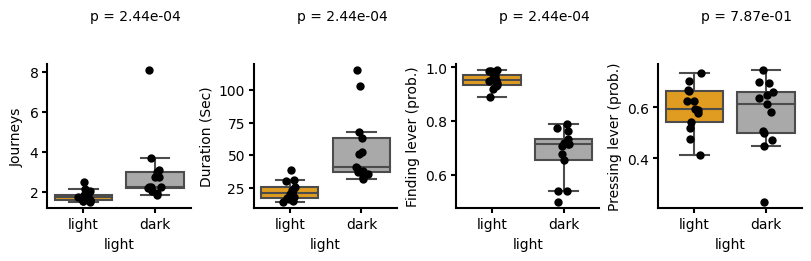

In [8]:
col = 1
row = 2
fig = plt.figure(figsize=(8,5),constrained_layout=False) # create the overall figure to put all the axes on
gsf = fig.add_gridspec(nrows=2, ncols=1,wspace=0.0,hspace=0.4) # one gridspec including all the figure

gsbox = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gsf[1])
plot_boxplots(gsbox)

## extended data Fig.3
The sameas Fig.1 h-k but consider trials as statistical unit:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


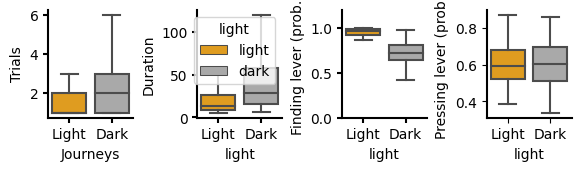

In [9]:
def figurePanelDefaultSize():
    """
    Use to keep the size of panels similar across figures
    """
    return (0.40, 5.7)

def setFigureFontSizes():
    fontsize = 10
    fontweight = 'normal'
    fontproperties = {'weight': fontweight, 'size': fontsize}
    plt.rc('axes', labelsize=fontsize, titlesize=fontsize)

col, row = 1, 4
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col * sizePerCol, row * sizePerRow), constrained_layout=True)
gs = gridspec.GridSpec(1, 4, figure=fig)

fontsize = 10
linewidth = 1.5
color = ['orange', 'darkgray']

dfJPress = df.loc[:,["light","nJourneys","nJourneysAtLever","nJourneysWithPress"]].groupby([df["light"],df["sessionName"]]).sum()
dfJPress=dfJPress.reset_index() # get rid of hierarchical index
dfJPress["findLeverProb"] = dfJPress["nJourneysAtLever"]/ dfJPress["nJourneys"]
dfJPress["pressProb"] = dfJPress["nJourneysWithPress"]/ dfJPress["nJourneysAtLever"]

# 1. Trial Duration
ax = plt.subplot(gs[1])
ax.grid(False)
ax = sns.boxplot(x="light", y="duration", data=df, dodge=False, showfliers=False, order=["light", "dark"], hue='light', palette=color)
ax.set_ylabel('Duration', fontsize=fontsize)
ax.set_xticklabels(['Light', 'Dark'], fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.xaxis.set_tick_params(width=linewidth)
ax.yaxis.set_tick_params(width=linewidth)

# 2. Number of Journeys per Trial
ax = plt.subplot(gs[0])
ax.grid(False)
ax = sns.boxplot(x="light", y="nJourneys", data=df, dodge=False, showfliers=False, order=["light", "dark"], palette=color)
ax.set_xlabel("Journeys", fontsize=fontsize)
ax.set_ylabel("Trials", fontsize=fontsize)
ax.set_xticklabels(['Light', 'Dark'], fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.xaxis.set_tick_params(width=linewidth)
ax.yaxis.set_tick_params(width=linewidth)

# 3. Finding Lever Probability
ax = plt.subplot(gs[2])
ax = sns.boxplot(x="light", y="findLeverProb", data=dfJPress, dodge=False, showfliers=False, order=["light", "dark"],palette=color)
ax.set_ylabel("Finding lever (prob.)", fontsize=fontsize)
ax.set_xticklabels(['Light', 'Dark'], fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.xaxis.set_tick_params(width=linewidth)
ax.yaxis.set_tick_params(width=linewidth)
ax.set_ylim([0, 1.2])

# 4. Pressing Lever Probability
ax = plt.subplot(gs[3])
ax.grid(False)
ax = sns.boxplot(x="light", y="pressProb", data=dfJPress, dodge=False, showfliers=False, order=["light", "dark"],palette=color)
ax.set_ylabel("Pressing lever (prob.)", fontsize=fontsize)
ax.set_xticklabels(['Light', 'Dark'], fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
# Create the legend
legend = ax.legend()

# Turn off the legend
legend.set_visible(False)
